# Calibrate

Do imports.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from ae483tools import *

## Find $l_1$

Load data for a flight in which the drone sat motionless on the hard floor.

In [109]:
raw_data_drone, raw_data_mocap = load_hardware_data('floor2.json')

Resample drone data.

You may find that some of the data at the start or end of your flight are garbage. For this reason, `resample_data_drone` has two optional arguments:

* `t_min_offset` is how many seconds you want to ignore (i.e., delete) at the start of the data
* `t_max_offset` is how many seconds you want to ignore (i.e., delete) at the end of the data

To use these arguments effectively, you'll want to plot the data first (evaluate the next three cells to do this, for example) and then go back and play with the offsets. We won't mention these arguments again, but you should consider using them, as necessary, with **every** new dataset you collect and analyze.

In [110]:
data_drone = resample_data_drone(raw_data_drone, t_min_offset=1., t_max_offset=1.)

t = data_drone['time']
z_drone = data_drone['stateEstimate.z']

Resample mocap data.

In [111]:
data_mocap = resample_data_mocap(raw_data_mocap, t)

z_mocap = data_mocap['z']

Plot data.

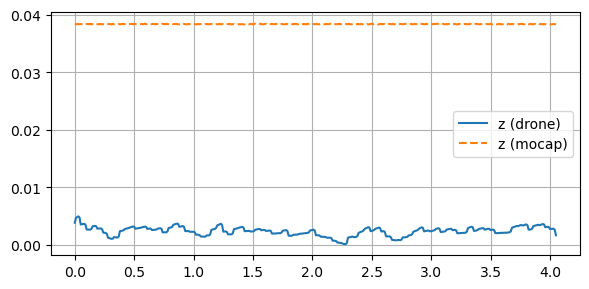

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), tight_layout=True)
ax.plot(t, z_drone, label='z (drone)')
ax.plot(t, z_mocap, '--', label='z (mocap)')
ax.legend()
ax.grid()

Find $l_1$ by... **FIXME**.

In [113]:
#l_1 = 0.0 # <-- FIXME

avg_carpet = 0
for i in z_drone:
    avg_carpet += i
avg = avg_carpet / len(z_drone)
print(avg)

l_1 = z_mocap[0]
print(l_1)

print(f'l_1 = {l_1:.5f}')

0.0023560584494254663
0.038329486846923826
l_1 = 0.03833


# Find $l_2$

Load data for a flight in which the drone sat motionless on the carpet.

In [114]:
raw_data_drone, raw_data_mocap = load_hardware_data('carpet.json')

Resample drone data.

In [115]:
data_drone = resample_data_drone(raw_data_drone, t_min_offset=1., t_max_offset=1.)

t = data_drone['time']
z_drone = data_drone['stateEstimate.z']

Resample mocap data.

In [116]:
data_mocap = resample_data_mocap(raw_data_mocap, t)

z_mocap = data_mocap['z']

Plot data.

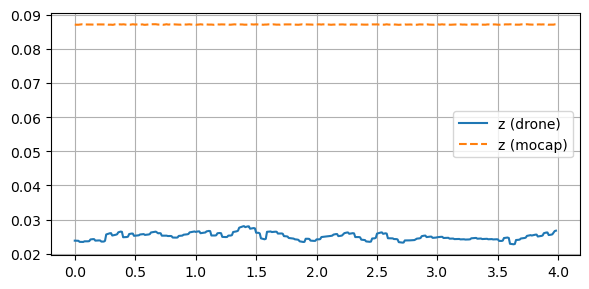

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), tight_layout=True)
ax.plot(t, z_drone, label='z (drone)')
ax.plot(t, z_mocap, '--', label='z (mocap)')
ax.legend()
ax.grid()

Find $l_2$ by... **FIXME**.

In [118]:
l_2 = z_mocap[0] # <-- FIXME

# avg_floor = 0
# for i in z_drone:
#     avg_floor += i
# avg = avg_floor / len(z_drone)
# print(avg)

# l_2 = z_mocap[0] - avg
# print(l_2)

print(f'l_2 = {l_2:.5f}')

l_2 = 0.08706


# Find $l_3$ and $l_4$

Load data for a flight in which the drone sat motionless on "stilts" on the carpet.

In [119]:
raw_data_drone, raw_data_mocap = load_hardware_data('stilts.json')

Resample drone data.

In [120]:
data_drone = resample_data_drone(raw_data_drone, t_min_offset=1., t_max_offset=1.)

t = data_drone['time']
z_drone = data_drone['stateEstimate.z']

Resample mocap data.

In [121]:
data_mocap = resample_data_mocap(raw_data_mocap, t)

z_mocap = data_mocap['z']

Plot data.

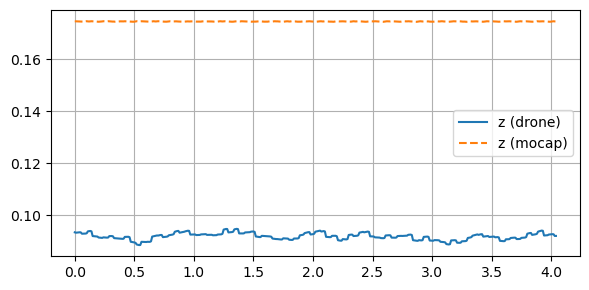

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), tight_layout=True)
ax.plot(t, z_drone, label='z (drone)')
ax.plot(t, z_mocap, '--', label='z (mocap)')
ax.legend()
ax.grid()

Find $l_3$ by... **FIXME** and find $l_4$ by... **FIXME**.

In [123]:
l_4 = z_mocap[0] # <-- FIXME


avg_stilt = 0
for i in z_drone:
    avg_stilt += i
avg = avg_stilt / len(z_drone)
print(avg)



l_3 = avg # <-- FIXME

print(f'l_3 = {l_3:.5f}')
print(f'l_4 = {l_4:.5f}')

0.09194302745623352
l_3 = 0.09194
l_4 = 0.17452


# Find $d_1$ and $d_2$

Find $d_1$ by... **FIXME**.

In [126]:
#d_1 = 0. # <-- FIXME

d_1 = l_4 - l_3 - l_2 + l_1

print(f'd_1 = {d_1:.5f}')

d_1 = 0.03385


Find $d_2$ by... **FIXME**.

In [127]:
d_2 = 0. # <-- FIXME

d_2 = l_1 - d_1

print(f'd_2 = {d_2:.5f}')

d_2 = 0.00448
